# 5 Stages of Summarization: From Beginner to Expert

Summarization is a vital component of many LLM tasks. In practical scenarios, you'll run into use cases where turning extensive texts into concise, meaningful points is essential.

Depending on the text's length you're addressing, various summarization techniques can be applied.

Here, we'll outline 5 distinct levels of summarization, ranging from basic to advanced. Remember, these aren't the only methods out there.

**5 Levels Of Summarization:**
Summarize a few sentences - Basic Prompt
Summarize several paragraphs - Prompt Templates
Summarize a few pages - Map Reduce
Summarize a whole book - Best Representation Vectors
Summarize text of an indeterminate length - Agents.
1. **Summarize a few sentences** - Basic Prompt 
2. **Summarize several paragraphs** - Prompt Templates 
3. **Summarize a few pages** - Map Reduce 
4. **Summarize a few pages** - Recurssive Map Reduce
5. **Summarize a whole book** - Best Representation Vectors

Stay tuned for level 6 
First, let's import our Konko API key from a .dotenv file.


In [1]:
from dotenv import load_dotenv,find_dotenv

load_dotenv(find_dotenv())

True

## Level 1: Basic Prompt - Summarize a few sentences

If you're looking to briefly summarize just a few sentences, you can simply use a direct prompt and then copy and paste your text.

**Summarizing JIRA Tickets:**

Businesses often drown in many JIRA tickets, overwhelming teams. Summarizing helps quickly grasp each ticket's essence amid the chaos. 

However, this method isn't scalable and is best suited for limited scenarios, fitting perfectly as level #1!

In [2]:
from langchain import Konko

In [3]:
llm = Konko(model_id='meta-llama--Llama-2-13b-chat-hf')

The crucial step is giving clear directions to the LLM, guiding its action. Here, I'm instructing the model to produce a summary of the following Jira Ticket.

In [4]:
prompt = """
Could you, in your eloquent way, condense this ticket's story for us?

Ticket Content:
Ticket ID: JIRA-78901
Title: Implement Dynamic Cache Refresh Mechanism
Reporter: Alex Thompson
Assigned to: Jamie Cortez
Status: Open
Priority: High
Description:
Over the past few months, our XYZ product's analytics has shown a 25% decrease in response time, especially during peak usage hours. Analysis attributes this to cache bottlenecks, which are affecting user satisfaction scores and leading to an uptick in support tickets. This ticket proposes the development of a dynamic cache refresh mechanism. The intent is to have a smarter cache system that intelligently adjusts refresh rates based on real-time traffic loads and query complexities. By doing so, we aim to enhance server responsiveness, ensuring users have a seamless experience. This mechanism should also provide admin users with an interface to set manual overrides if needed. It's imperative that this solution seamlessly integrates with our current Redis setup and be scalable for future growth.

Dependencies:

Completion of ticket JIRA-78890 (Upgrade to Redis 7.0).
Integration testing with the recently introduced user analytics module.
Coordination with the database team and DevOps for deployment considerations.
Comments:
John Doe: Keep in mind our scheduled maintenance on the 20th. We shouldn’t have overlapping activities.
Lucy Green: QA team will require documentation on the new features to ensure comprehensive testing. Expecting at least 3 days for complete QA post-implementation.
Carlos Mendoza: Has anyone considered the impact on our mobile users? We need to ensure the changes are optimized for both desktop and mobile platforms.


"""

In [5]:
num_tokens = llm.get_num_tokens(prompt)
print (f"Our prompt has {num_tokens} tokens")

Our prompt has 371 tokens


In [6]:
output = llm(prompt)
print (output)

 Sure! Here is the story of the ticket condensed:

The XYZ product's analytics have shown a 25% decrease in response time, mostly during peak usage hours. This is due to cache bottlenecks, which negatively affect user satisfaction scores and lead to more support tickets. To solve this issue, a dynamic cache refresh mechanism is proposed. This would allow for a smarter cache system that adjusts refresh rates based on real-time traffic loads and query complexities. This would improve server responsiveness, giving users a seamless experience. The mechanism would also give admin users an interface to set manual overrides if necessary. The solution must integrate with the current Redis setup and be scalable for future growth.

Dependencies for this ticket include the completion of JIRA-78890 (upgrade to Redis 7.0), integration testing with the recently introduced user analytics module, and coordination with the database team and DevOps for deployment considerations. Additionally, the QA tea

**The summary, though condensed, remains detailed for quick reads. We need a shorter version focusing on key points. Let's tweak our prompt for a clearer, concise snapshot without unnecessary specifics.**

In [7]:
prompt = """
Could you, in your eloquent way, condense this ticket's story for us? Our tech team would love a concise summary, highlighting:
1. The core issue or feature being addressed.
2. The primary expected outcomes.
3. Any crucial dependencies or constraints.
4. The urgency or priority level.

Ticket Content:
Ticket ID: JIRA-78901
Title: Implement Dynamic Cache Refresh Mechanism
Status: Open
Priority: High
Description:
Over the past few months, our XYZ product's analytics has shown a 25% decrease in response time, especially during peak usage hours. Analysis attributes this to cache bottlenecks, which are affecting user satisfaction scores and leading to an uptick in support tickets. This ticket proposes the development of a dynamic cache refresh mechanism. The intent is to have a smarter cache system that intelligently adjusts refresh rates based on real-time traffic loads and query complexities. By doing so, we aim to enhance server responsiveness, ensuring users have a seamless experience. This mechanism should also provide admin users with an interface to set manual overrides if needed. It's imperative that this solution seamlessly integrates with our current Redis setup and be scalable for future growth.

Dependencies:

Completion of ticket JIRA-78890 (Upgrade to Redis 7.0).
Integration testing with the recently introduced user analytics module.
Coordination with the database team and DevOps for deployment considerations.
Comments:
John Doe: Keep in mind our scheduled maintenance on the 20th. We shouldn’t have overlapping activities.
Lucy Green: QA team will require documentation on the new features to ensure comprehensive testing. Expecting at least 3 days for complete QA post-implementation.
Carlos Mendoza: Has anyone considered the impact on our mobile users? We need to ensure the changes are optimized for both desktop and mobile platforms.


"""

In [8]:
num_tokens = llm.get_num_tokens(prompt)
print (f"Our prompt has {num_tokens} tokens")

Our prompt has 405 tokens


In [9]:
output = llm(prompt)
print (output)

 Of course! Here is the condensed version of the ticket you requested:

The core issue being addressed is the 25% decrease in response time in the XYZ product's analytics, caused by cache bottlenecks, which negatively impact user satisfaction and lead to more support tickets. The proposed solution is to develop a dynamic cache refresh mechanism that adjusts refresh rates based on real-time traffic loads and query complexities to enhance server responsiveness and ensure a seamless user experience.

The primary expected outcomes are improved server responsiveness, reduced cache bottlenecks, and enhanced user satisfaction.

Crucial dependencies include the completion of ticket JIRA-78890 (Upgrade to Redis 7.0) and integration testing with the recently introduced user analytics module. Additionally, coordination with the database team and DevOps for deployment considerations is necessary.

The urgency or priority level is high, and the implementation must be done carefully to ensure no ove

Nice! That's much better, but let's look at something we can automate a bit more

## Level 2: Prompt Templates - Summarize a few paragraphs

Prompt templates are an effective method to dynamically insert specific text segments into your prompts. Think of them as akin to [Python f-strings](https://realpython.com/python-f-strings/), but tailored for seamless integration with language models.

Let's delve into 2 short business documents: one about a **staff training memo** (representing "Training and Onboarding") and the other concerning a **yearly financial report** (representing "Investor Relations").

While we have demonstrated the utility with these two specific scenarios, the potential applications are vast. For instance:

1. **Customer Support:** Extract key issues from feedback to enhance product or service offerings.
2. **Executive Briefings:** Create concise summaries for top decision-makers to grasp essential details without wading through extensive reports.
3. **Product Reviews:** Summarize feedback on new product launches to quickly gauge customer sentiment and identify areas for improvement.
4. **Market Research:** Collate insights about the latest industry trends and competitor activities in a brief format for strategic planning.

By understanding the context and objectives, users can modify and tailor these templates to suit a wide array of business needs.


In [10]:
from langchain import PromptTemplate
import os

In [11]:
paul_graham_essays = ['data/memo/Onboarding_doc.txt', 'data/memo/Investor_relations.txt']

essays = []

for file_name in paul_graham_essays:
    with open(file_name, 'r') as file:
        essays.append(file.read())

Let's print out a preview of the essays to see what they look like

In [12]:
for i, essay in enumerate(essays):
    print (f"Essay #{i+1}: {essay[:300]}\n")

Essay #1: Training and Onboarding

Our onboarding program for the Design Department has been formulated with extensive research and insights from current and past employees. The first week is dedicated to understanding the company’s history, mission, vision, and core values. We ensure this through a series of

Essay #2: Investor relations report

In the annual overview for 2022, XYZ has shown remarkable resilience and growth despite the challenges posed by the global landscape. Beginning with our achievements, XYZ's revenue surged by 25%, outpacing our closest competitors. This impressive growth can be attributed t



Next let's create a prompt template which will hold our instructions and a placeholder for the essay. In this illustration, we'll focus on extracting the core details, accomplishments, hurdles, and forthcoming plans or tactics.

In [13]:
template = """
Summarize the key achievements, main challenges faced, and any forward-looking strategies or 
initiatives mentioned in the document.

{essay}
"""

prompt = PromptTemplate(
    input_variables=["essay"],
    template=template
)

Then let's loop through the 2 essays and pass them to our LLM. I'm applying .strip() on the summaries to remove the white space on the front and back of the output

In [14]:
for essay in essays:
    summary_prompt = prompt.format(essay=essay)
    
    num_tokens = llm.get_num_tokens(summary_prompt)
    print (f"This prompt + essay has {num_tokens} tokens")
    
    summary = llm(summary_prompt)
    
    print (f"Summary: {summary.strip()}")
    print ("\n")

This prompt + essay has 418 tokens
Summary: Sure! Here is a summary of the key achievements, main challenges faced, and any forward-looking strategies or initiatives mentioned in the document:

Key Achievements:

* The onboarding program for the Design Department has been formulated with extensive research and insights from current and past employees.
* The program includes a series of engaging videos, quizzes, and group discussions to ensure new hires understand the company's history, mission, vision, and core values.
* New hires are introduced to department-specific tools, software, and practices, including Adobe Suite, Sketch, and Figma, through hands-on learning with a mentor.
* Workshops are held on UI/UX principles, typography, color theory, and proprietary design methodologies.
* Collaboration with other departments, such as Marketing and Development, is emphasized to understand the workflow, feedback loop, and importance of cross-functional teams.

Main Challenges Faced:

* Som

## Level 3: Map Reduce - Summarize a few pages 

**Why Summarize?**
Summarizing large reports, like the "Market report of The individual health insurance market in 2023," provides quick insights for businesses. It aids in:

1. Faster decision-making.
2. Clear stakeholder communication.
3. Efficient meeting preparations.
4. Sharing insights across teams.


If you have multiple pages you'd like to summarize, you'll likely run into a token limit. Token limits won't always be a problem, but it is good to know how to handle them if you run into the issue.

The chain type "Map Reduce" is a method that helps with this. You first generate a summary of smaller chunks (that fit within the token limit) and then you get a summary of the summaries.

Check out [this video](https://www.youtube.com/watch?v=f9_BWhCI4Zo) for more information on how chain types work

**Note: LLM Token Limits:**

>The LLM Llama 2 13B hosted by Konko has a current max token limit of 512. Though Llama 2 models support up to 4096 tokens, this particular instance is set at 500. Good news: users will soon be able to host models with different token limits.

In [15]:
from langchain.chains.summarize import load_summarize_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [16]:
market_essay = 'data/MarketReport_healthInsurance_shortVersion.txt'

with open(market_essay, 'r') as file:
    essay = file.read()

Let's see how many tokens are in this essay

In [17]:
llm.get_num_tokens(essay)

Token indices sequence length is longer than the specified maximum sequence length for this model (1101 > 1024). Running this sequence through the model will result in indexing errors


1101

That's too many, let's split our text up into chunks so they fit into the prompt limit. I'm going a chunk size of 2,000 characters. 

> You can think of tokens as pieces of words used for natural language processing. For English text, **1 token is approximately 4 characters** or 0.75 words. As a point of reference, the collected works of Shakespeare are about 900,000 words or 1.2M tokens.

This means the number of tokens we should expect is 2000 / 4 = ~500 token chunks. But this will vary, each body of text/code will be different

In [18]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n"], chunk_size=2000, chunk_overlap=500)

docs = text_splitter.create_documents([essay[:4000]])

In [19]:
num_docs = len(docs)

num_tokens_first_doc = llm.get_num_tokens(docs[0].page_content)

print (f"Now we have {num_docs} documents and the first one has {num_tokens_first_doc} tokens")

Now we have 3 documents and the first one has 365 tokens


Great, assuming that number of tokens is consistent in the other docs we should be good to go. Let's use LangChain's [load_summarize_chain](https://python.langchain.com/en/latest/use_cases/summarization.html) to do the `map_reducing` for us. We first need to initialize our chain

**Determine Your Output Format**

Want a bullet-point summary? Tailor your prompts accordingly. By using custom prompts, you can instruct the model with precision.

Here's a peek into setting up those prompts:

**Map Prompt:** This will remain consistent for mapping. The goal? To achieve a concise summary.

In [20]:
map_prompt = """
Write a concise summary of the following:
"{text}"
CONCISE SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

**Combine Prompt:** This is where the magic of combining happens. For our goal, we want to refine and compile our mapped summaries into bullet points.

In [21]:
combine_prompt = """
Write a concise summary of the following text delimited by triple backquotes.
Return your response in bullet points which covers the key points of the text.
```{text}```
BULLET POINT SUMMARY:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [22]:
summary_chain = load_summarize_chain(llm=llm,
                                     chain_type='map_reduce',
                                     map_prompt=map_prompt_template,
                                     combine_prompt=combine_prompt_template
                                    )

In [23]:
output = summary_chain.run(docs)

**Here is the summary**

In [24]:
print (output)

 Sure! Here is a concise summary of the text provided in bullet points:

• In 2023, there were approximately 16 million enrollees in the individual health insurance market, with 42% enrolling through Blues and 14% through insurtechs.

• There was a 9% increase in insurer participation, with 26 new insurers entering the market and 20 exiting.

• Consumers had more plan options, with an average of 5 insurers and 88 plans available, compared to 3 insurers and 27 plans in 2018.

• Gold plans made up 24% of offerings, an increase from 19% in 2022.

• Rates for plans increased across all metal tiers and categories in 2023, with platinum and catastrophic plans seeing the highest increases at 10% and 5%, respectively.


## Level 4: Summarize a few pages - Recurssive Map Reduce

While the above summarization technique appears effective, it's essential to recognize some inherent challenges. Below, we outline these issues and propose solutions.



**Current Challenge:**

LangChain's 'Map Reduce' breaks down and summarizes content segments. However, the issue arises during the final summarization stage, when these summarized parts are consolidated, particularly for lengthy documents. This process can often surpass the token limit.

We're now delving into a custom approach for iterative summarization. While our method offers benefits, it's important to highlight its inherent constraints, which we'll discuss further.

In [25]:
import math
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

MAX_TOKENS_SUMMARY = 500
SUMMARY_SYS_MSG = """Write a concise summary of the following:
"{input}"
CONCISE SUMMARY:"""

FINAL_SUMMARY_SYS_MSG = """
Write a concise summary of the following text delimited by triple backquotes.
Return your response in bullet points which covers the key points of the text.
```{input}```
BULLET POINT SUMMARY:
"""


def token_len(input: str) -> int:
    """Get token length"""
    return llm.get_num_tokens(input)

def chunk(input: str) -> list:
    input_tokens = token_len(input)
    count = math.ceil(input_tokens / MAX_TOKENS_SUMMARY)
    k, m = divmod(len(input), count)
    chunks = [
        input[i * k + min(i, m) : (i + 1) * k + min(i + 1, m)] for i in range(count)
    ]
    return chunks

def summarize(input: str, final: bool = False) -> str:
    if token_len(input) <= MAX_TOKENS_SUMMARY:
        final = True  # Force bullet points if within token limit

    # Use appropriate system message based on final flag
    system_message = SystemMessagePromptTemplate.from_template(
        template=FINAL_SUMMARY_SYS_MSG if final else SUMMARY_SYS_MSG
    )
    human_message = HumanMessagePromptTemplate.from_template(
        template="Input: {input}"
    )

    if final:  # Directly summarize with bullet points if final flag is set
        prompt = ChatPromptTemplate(
            input_variables=["input"],
            messages=[system_message, human_message],
        )
        _input = prompt.format_prompt(input=input)
        single_string_prompt = (_input.to_messages()[0].content)
        output = llm(single_string_prompt)
        return output

    # If not 'final', proceed with chunk-wise summarization
    chunks = chunk(input=input)
    summary = ""

    for i in chunks:
        prompt = ChatPromptTemplate(
            input_variables=["input"],
            messages=[system_message, human_message],
        )

        _input = prompt.format_prompt(input=i)
        single_string_prompt = (_input.to_messages()[0].content)
        output = llm(single_string_prompt)
        summary += f"\n{output}"

    # Check token length of the summary and decide next step
    sum_tokens = token_len(input=summary)

    if sum_tokens > MAX_TOKENS_SUMMARY:
        return summarize(input=summary, final=True)  # Recur with 'final' set to True

    return summarize(input=summary, final=True)

In [26]:
market_essay = 'data/MarketReport_healthInsurance_OriginalVersion.txt'

with open(market_essay, 'r') as file:
    essay = file.read()

Let's see how many tokens are in this essay

In [27]:
llm.get_num_tokens(essay)

Token indices sequence length is longer than the specified maximum sequence length for this model (2482 > 1024). Running this sequence through the model will result in indexing errors


2482

**Let's examine the summary generated by our tailored method.**

In [28]:
output = summarize(essay)

Token indices sequence length is longer than the specified maximum sequence length for this model (2482 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2482 > 1024). Running this sequence through the model will result in indexing errors


In [29]:
print(output)

 Sure! Here is a concise summary of the provided text in bullet point form:

• In 2023, the individual health insurance market saw significant growth, with over 3.6 million new consumers entering the market and choosing from an average of 88 plans.

• Consumer participation has increased by 25% since 2020.

• Recent regulations proposed by the Centers for Medicare & Medicaid Services (CMS) may limit the number of plans each insurer can offer starting in 2024.

• In 2023, participation in the health insurance market increased for the fifth consecutive year, with national insurers experiencing the largest growth.

• Insurtechs, however, saw a decline in participation.

• Consumer access to multiple insurer options also increased, with 87% of consumers having access to three or more insurers in 2023.

• There was an increase in the number of plan options available to consumers.

• The Centers for Medicare and Medicaid Services (CMS) proposed regulations to simplify the shopping experience

Looks good!

## Level 5: Best Representation Vectors - Summarize an entire book

As we navigate the intricacies of document summarization, it's evident that traditional methods, though robust in many scenarios, possess specific challenges. Let's briefly revisit these:

1. Recursive Summarization:

    **Function:** It partitions lengthy documents into digestible sections, which are individually summarized. These summaries are then amalgamated and further refined, iterating until a concise version surfaces.

    **Shortcomings:**
        1. Interrupted Logical Flow: Certain tools, such as LangChain, might split content without preserving its natural continuity.
        2. Inconsistent Point Emphasis: The varied lengths of distinct points by authors can result in pivotal information being cut short or inadequately summarized.
        
    
2. The 'Refine' Method:

    **Function:** It incrementally improves summaries as more content is processed.

    **Shortcomings:**
        1. Inefficiency: Unlike recursive methods which leverage logarithmic time, this method proceeds linearly.
        2. Bias Towards Initial Content: Preliminary segments may disproportionately influence the summary, even if they're unrelated to the main content.
    
Despite advances in language models, it's clear that some level of document segmentation and recursive summarization will always be necessary, especially for voluminous texts.

In the upcoming section, we'll introduce an approach that seeks to address these challenges, ensuring coherent and meaningful summaries.

We will be distilling expansive documents like "The Economic Potential of Generative AI."



In [30]:
from langchain.document_loaders import PyPDFLoader

# Load the book
loader = PyPDFLoader("data/the-economic-potential-of-generative-ai-the-next-productivity-frontier-vf.pdf")
pages = loader.load()

# Combine the pages, and replace the tabs with spaces
text = ""

for page in pages:
    text += page.page_content
    
text = text.replace('\t', ' ')

In [31]:
num_tokens = llm.get_num_tokens(text)

print (f"This book has {num_tokens} tokens in it")

Token indices sequence length is longer than the specified maximum sequence length for this model (33041 > 1024). Running this sequence through the model will result in indexing errors


This book has 33041 tokens in it


Handling a vast 33K tokens exceeds even GPT's 32K capacity, and with a cost of $1.00 for the prompt, we need an efficient approach. 

**Objective**: Distill the book's essence through strategic chunking.

- **Chunk & Embed**: Divide the book into significant sections and transform them into vectors using embeddings.
  
- **Diversify**: Opt for a blend of chunks providing both a holistic and varied book perspective. Consider: Which 10 passages best encapsulate the book's essence?
  
- **Clustering & Selection**: Group similar vectors, pinpointing the ones that most exemplify each cluster, and subsequently summarize these selected portions.
  
- **End Goal**: Create a compelling summary that, while potentially losing some detail, captures the primary content.

Remember, this is a tailored approach, not the definitive solution. And yes, summarizing an entire book always entails some loss of detail!


In [32]:
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter

from langchain import Konko


from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.chains.summarize import load_summarize_chain


import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import numpy as np
from sklearn.cluster import KMeans

In [33]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", "\t"], chunk_size=2500, chunk_overlap=100)

docs = text_splitter.create_documents([text])

In [34]:
num_documents = len(docs)

print (f"Now our book is split up into {num_documents} documents")

Now our book is split up into 70 documents


Let's get our embeddings of those 70 documents

In [35]:
embeddings = HuggingFaceEmbeddings()

vectors = embeddings.embed_documents([x.page_content for x in docs])

Now let's cluster our embeddings. There are a ton of clustering algorithms you can chose from. Please try a few out to see what works best for you!

In [36]:
# Assuming 'embeddings' is a list or array of 768-dimensional embeddings

# Choose the number of clusters, this can be adjusted based on the book's content.
# I played around and found ~4 was the best.
num_clusters = 4

# Perform K-means clustering
vectors_array = np.array(vectors)
print(vectors_array.shape)
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors_array)


(70, 768)


/Users/shivanimodi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The identified clusters offer an intriguing glimpse into the book's progression. As the narrative evolves, we can anticipate shifts in the clusters, reflecting the varying semantic contexts.

In [37]:
kmeans.labels_

array([2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1,
       2, 1, 3, 3, 3, 3, 3, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2], dtype=int32)

This is neat, but in any clustering task, visualizing them is quite compelling. Don't forget to incorporate colors.

Additionally, we should perform dimensionality reduction to bring down the vectors from 768 dimensions to just 2. While this approach isn't rigorous data science, it aligns with our goal of achieving an 80% solution.

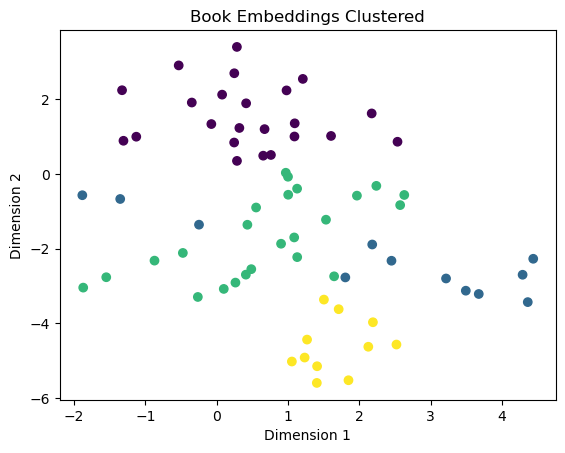

In [38]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


import warnings
from warnings import simplefilter
import numpy as np


simplefilter(action='ignore', category=FutureWarning)

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
vectors = np.array(vectors)
reduced_data_tsne = tsne.fit_transform(vectors)

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Book Embeddings Clustered')
plt.show()

Next, we should identify the vectors nearest to the cluster centroids (the central point).

Below is a function that accomplishes this efficiently.

In [39]:
# Determine the embeddings closest to the centroids

# Initialize a list to store indices of nearest points
closest_indices = []

# Iterate over all clusters
for i in range(num_clusters):
    
    # Calculate distances from the current cluster's center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)
    
    # Identify the index of the minimum distance (closest point)
    closest_index = np.argmin(distances)
    
    # Store the identified index in the list
    closest_indices.append(closest_index)


Now, arrange them in sequence (to ensure chunks are processed sequentially).

In [40]:
selected_indices = sorted(closest_indices)
selected_indices

[0, 13, 23, 60]

It's intersting to see which chunks pop up at most descriptive. 

Let's create our custom prompts.

In [41]:
map_prompt = """
You will be given a single passage of a book. This section will be enclosed in triple backticks (```)
Your goal is to give a concise summary of this section so that a reader will have a full understanding of what happened.
Your response should be at least three paragraphs and fully encompass what was said in the passage.

```{text}```
Concise SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

**In this example I will do the map reduce manually**

In [42]:
map_chain = load_summarize_chain(llm=llm,
                             chain_type="stuff",
                             prompt=map_prompt_template)

Then go get your docs which the top vectors represented.

In [43]:
selected_docs = [docs[doc] for doc in selected_indices]

Let's loop through our selected docs and get a good summary for each chunk. We'll store the summary in a list.

In [46]:
# Initialize a list for storing summaries
summaries = []

# Iterate over the selected documents
for idx, document in enumerate(selected_docs):
    # Obtain a summary for the specific chunk
    summarized_chunk = map_chain.run([document])
    
    # Add the summarized chunk to the summaries list
    summaries.append(summarized_chunk)
    
    print (f"Processed Summary #{idx} (from chunk #{selected_indices[idx]}) - Snippet: {summarized_chunk[:250]} \n")

Processed Summary #0 (from chunk #0) - Snippet:  Sure! Here is a concise summary of the provided passage:

The passage discusses the economic potential of generative AI and its impact on productivity. According to the authors' research, generative AI could add $2.6 trillion to $4.4 trillion annual 

Processed Summary #1 (from chunk #13) - Snippet:  Sure! Here is a concise summary of the provided passage:

Generative AI can significantly improve customer care functions by increasing productivity, reducing response time, and increasing sales. By instantly retrieving data on specific customers, h 

Processed Summary #2 (from chunk #23) - Snippet:  Sure! Here is a concise summary of the provided passage:

The passage discusses the potential benefits of using generative AI in various industries, including retail, banking, and life sciences. In the retail industry, generative AI can accelerate c 

Processed Summary #3 (from chunk #60) - Snippet:  Sure! Here is a concise summary of the provid

Great, now that we have our list of summaries, let's get a summary of the summaries

In [47]:
summaries = "\n".join(summaries)

# Convert it back to a document
summaries = Document(page_content=summaries)

print (f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 827 tokens


As mentioned earlier 

> The LLM Llama 2 13B hosted by Konko has a current max token limit of 512. Though Llama 2 models support up to 4096 tokens, this particular instance is set at 500. Good news: users will soon be able to host models with different token limits.

We would need to run map reduce twice!

In [48]:
combine_prompt = """
You will be given a series of summaries from a book. The summaries will be enclosed in triple backticks (```)
Your goal is to give a concise summary of what happened in the story.
The reader should be able to grasp what happened in the book.

```{text}```
CONCISE SUMMARY:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [49]:
reduce_chain = load_summarize_chain(llm=llm,
                             chain_type="stuff",
                             prompt=combine_prompt_template,
                                   )

In [50]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", "\t"], chunk_size=2500, chunk_overlap=50)

docs = text_splitter.create_documents([summaries.page_content])

In [51]:
num_documents = len(docs)

print (f"Now our summaries from 1st iteration from map reduce is split up into {num_documents} documents")

Now our summaries from 1st iteration from map reduce is split up into 2 documents


In [52]:
# Initialize a list for storing summaries
summaries = []

# Iterate over the selected documents
for idx, document in enumerate(docs):
    
    # Obtain a summary for the specific chunk
    summarized_chunk = map_chain.run([document])
    
    # Add the summarized chunk to the summaries list
    summaries.append(summarized_chunk)
    
    print (f"Processed Summary #{idx} (from chunk #{selected_indices[idx]}) - Snippet: {summarized_chunk[:250]} \n")

Processed Summary #0 (from chunk #0) - Snippet:  Sure! Here is a concise summary of the provided passage:

The passage explores the economic potential of generative AI and its impact on productivity across various industries. Generative AI has the potential to add $2.6 trillion to $4.4 trillion an 

Processed Summary #1 (from chunk #13) - Snippet:  Certainly! Here is a concise summary of the provided passage:

The passage explores the potential benefits of utilizing generative AI in various industries such as retail, banking, and life sciences. Generative AI can accelerate consumer research, e 



In [53]:
summaries = "\n".join(summaries)

# Convert it back to a document
summaries = Document(page_content=summaries)

print (f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 555 tokens


In [54]:
output = reduce_chain.run([summaries])

In [55]:
print (output)

 Sure! Here is a concise summary of the provided passages:

The passages explore the potential benefits and impact of generative AI on various industries and the global economy. Generative AI has the ability to automate work activities, increase productivity, and bring significant economic benefits, with the majority of value generated in customer operations, marketing and sales, software engineering, and R&D. The technology can enhance the customer experience, increase sales, and improve efficiency in various industries such as retail, banking, and life sciences. However, the impact of generative AI will not be evenly distributed across all occupations and industries, with higher-educated and higher-wage jobs being more affected. The pace of adoption is expected to accelerate, with estimates suggesting that half of today's work activities could be automated by 2030-2060.


Wow that was a long process, but you get the gist, hopefully we'll see some library abstractions in the coming months that do this automatically for us!